This tutorial was translated, edited and expanded based on a [notebook created by Álvaro Turicas](https://gist.github.com/turicas/da12b3c8e67a27e088d12d9c41be65d9#file-transcricao-de-textos-em-portugues-com-whisper-openai-ipynb).

---

# What is Whisper?

[Whisper](https://github.com/openai/whisper) is a speech-to-text transcription system developed by OpenAI. It is open source and uses a Transformer-based approach to convert spoken language into written text. Whisper has been trained on a large volume of multilingual data and can be used to transcribe audio files or online videos.


# Speeding up code execution

The execution of this model is much faster on a GPU. You can try using a GPU for free here on Colab by clicking on the menu "Runtime" > "Change runtime type". After that, select "GPU" under "Hardware Accelerator".

Note: if you are using the free version of Colab the option "GPU class" will not be enabled and the availability of GPUs is not guaranteed.

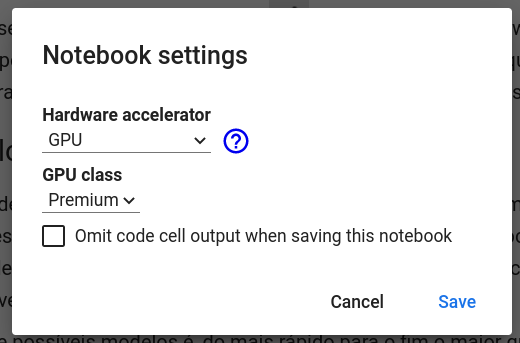


# Part 1) Install Whisper and define the model size and language

In [1]:
# Just run this cell
!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.9/792.9 kB 25.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 56.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.6 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.4/770.4 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 21.5 MB/s eta 0:00:0000:0100:01
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=796910 sha256=a63336ab720ddf6220d21f6ab4955abf4abe693fb9a20f3605

# Model sizes and languages

The sizes impact the quality of the result and the processing time (the better the quality, the longer the processing time). The choice between them is also related to the quality of the audio: if it is polluted with noise, you will probably need a higher quality template to be able to transcribe correctly.

"There are five model sizes, four with English-only versions, offering speed and accuracy tradeoffs. Below are the names of the available models and their approximate memory requirements and relative speed. The .en models for English-only applications tend to perform better, especially for the tiny.en and base.en models. We observed that the difference becomes less significant for the small.en and medium." (Source: [https://github.com/openai/whisper](https://github.com/openai/whisper))

The list of possible models is, from fastest to highest quality:

*   tiny
*   base
*   small
*   medium
*   large

You can just append ".en" at the end of them to use their English-only versions (i.e. "base.en")

The list of languages languages available are: 'Afrikaans', 'Albanian', 'Amharic', 'Arabic', 'Armenian', 'Assamese', 'Azerbaijani', 'Bashkir', 'Basque',
  'Belarusian', 'Bengali', 'Bosnian', 'Breton', 'Bulgarian', 'Burmese', 'Castilian', 'Catalan', 'Chinese', 'Croatian', 'Czech', 'Danish', 'Dutch', 'English',
  'Estonian', 'Faroese', 'Finnish', 'Flemish', 'French', 'Galician', 'Georgian', 'German', 'Greek', 'Gujarati', 'Haitian', 'Haitian Creole', 'Hausa', 'Hawaiian',
  'Hebrew', 'Hindi', 'Hungarian', 'Icelandic', 'Indonesian', 'Italian', 'Japanese', 'Javanese', 'Kannada', 'Kazakh', 'Khmer', 'Korean', 'Lao', 'Latin', 'Latvian',
  'Letzeburgesch', 'Lingala', 'Lithuanian', 'Luxembourgish', 'Macedonian', 'Malagasy', 'Malay', 'Malayalam', 'Maltese', 'Maori', 'Marathi', 'Moldavian', 'Moldovan',
  'Mongolian', 'Myanmar', 'Nepali', 'Norwegian', 'Nynorsk', 'Occitan', 'Panjabi', 'Pashto', 'Persian', 'Polish', 'Portuguese', 'Punjabi', 'Pushto', 'Romanian',
  'Russian', 'Sanskrit', 'Serbian', 'Shona', 'Sindhi', 'Sinhala', 'Sinhalese', 'Slovak', 'Slovenian', 'Somali', 'Spanish', 'Sundanese', 'Swahili', 'Swedish',
  'Tagalog', 'Tajik', 'Tamil', 'Tatar', 'Telugu', 'Thai', 'Tibetan', 'Turkish', 'Turkmen', 'Ukrainian', 'Urdu', 'Uzbek', 'Valencian', 'Vietnamese', 'Welsh',
  'Yiddish', 'Yoruba'.


In [2]:
# Choose a model size
# Available options: tiny.en,tiny,base.en,base,small.en,small,medium.en,medium,large-v1,large-v2,large

model_name = "medium"

# Choose the language using its code or the full name (e.g. Portuguese or Spanish)

lang_code = "en"


# Transcribing audio files

To transcribe an audio and download the files (both the transcription and the subtitle, which has the timestamps), perform the following steps:

1) Copy this notebook to your Drive ("File" > "Save a copy in Drive");

2) With your copy of this notebook open, close this version and upload the audio file you wish to transcribe by opening the file manager. You just need to click on the "Files" option (the folder icon 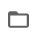) in the left corner. Then, you can use the "Upload Files" (the up arrow icon 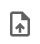) and choose the file or drag the file to the area below the folder icon (where the sample_data folder is);

3) Put the name of the file you want to transcribe into the code cell below: replace filename.mp3 with the name of the file you uploaded in the previous step. Uppercase is different from lowercase. Do not remove the quotes.

4) Choose one of the available templates (more details below) and edit the code cell. Again, keep the quotes and remind that the text is case-sensitive. The small template usually has good accuracy with low processing time.

5) Click on the play button 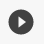 that is on the top left corner of the code cell.

6) Wait for the code to finish executing - the play button turns to stop during execution and turns to play again when it's done, preceded by the time it took for the code to execute. 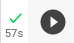

7) Open the file manager and look for a folder that starts with "output". There will be the transcript files in various formats (.txt is just the text, `.vtt and `.srt` is subtitles, with the times).

8) Download them by clicking on the three dots (image.png) and then on the option "Download".

9) After a while the notebook "disconnects" and all files (both the ones you sent and the ones generated) are lost. Download the transcripts as soon as the process finishes in order not to lose them.

## Define the filename (change the next cell)

In [3]:
# Change this line with the audio filename
filename = "change_this_filename.mp3"

### Just run the cell below

In [4]:
import subprocess, os

if os.path.exists(filename):
    subprocess.run(
        [
            "whisper",
            "--language", lang_code,
            "--word_timestamps", "True",
            "--model", model_name,
            "--output_dir", f"output-{model_name}",
            filename
        ]
    )
else:
    print(f"File '{filename}' does not exist.")


File 'change_this_filename.mp3' does not exist.


# Transcribing YouTube videos (change the next cell)

In [5]:
# Replace the YouTube URL

video_url = "https://www.youtube.com/watch?v=SZorAJ4I-sA&t=112s"

## Just run the cells below

In [6]:
# Install packages to download YT videos, extract audio and transcribe
!python -m pip install git+https://github.com/yt-dlp/yt-dlp.git
!pip install moviepy openai-whisper

  Cloning https://github.com/yt-dlp/yt-dlp.git to /tmp/pip-req-build-svssikty
  Running command git clone --filter=blob:none --quiet https://github.com/yt-dlp/yt-dlp.git /tmp/pip-req-build-svssikty
  Resolved https://github.com/yt-dlp/yt-dlp.git to commit 5cc09c004bd5edbbada9b041c08a720cadc4f4df
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 53.2 MB/s eta 0:00:00:00:01
  Created wheel for yt-dlp: filename=yt_dlp-2023.3.4-py2.py3-none-any.whl size=2758536 sha256=38c99e6e19425d3088f3f8a69aad95038556e7a684fcedb14b6567f999eb3550
  Stored in directory: /tmp/pip-ep

In [7]:
from moviepy.editor import VideoFileClip
import subprocess

yt_videofile = "yt_video.webm"
filename = "audio.mp3"

!yt-dlp -o {yt_videofile} {video_url}

In [8]:
VideoFileClip(yt_videofile).audio.write_audiofile(filename)

OSError: MoviePy error: the file yt_video.webm could not be found!
Please check that you entered the correct path.

In [ ]:
if os.path.exists(filename):
    subprocess.run(
        [
            "whisper",
            "--language", lang_code,
            "--word_timestamps", "True",
            "--model", model_name,
            "--output_dir", f"output-{model_name}",
            filename
        ]
    )
else:
    print(f"File '{filename}' does not exist.")


In [ ]:
# Let's check the transcription
!head -n20 output-medium/audio.txt

The neat thing about working in machine learning is that every few years,
somebody invents something crazy that makes you totally reconsider what's possible.
Like, models that can play Go or generate hyper-realistic faces.
And today, the mind-blowing discovery that's rocking everyone's world
is a type of neural network called a transformer.
Transformers are models that can translate text,
write poems and op-eds, and even generate computer code.
These have been used in biology to solve the protein-folding problem.
Transformers are like this magical, machine-learning hammer
that seems to make every problem into a nail.
If you've heard of the trendy new ML models BERT or GPT-3 or T5,
all of these models are based on transformers.
So if you want to stay hip in machine learning,
and especially in natural language processing,
you have to know about the transformer.
So in this video, I'm going to tell you about what transformers are,
how they work and why they've been so impactful.
Let's get 

In [ ]:
# Let's check the transcription
!head -n20 output-medium/audio.srt

1
00:00:00,000 --> 00:00:00,240
<u>The</u> neat thing about working in machine learning is that every few years,

2
00:00:00,240 --> 00:00:00,400
The<u> neat</u> thing about working in machine learning is that every few years,

3
00:00:00,400 --> 00:00:00,620
The neat<u> thing</u> about working in machine learning is that every few years,

4
00:00:00,620 --> 00:00:00,760
The neat thing<u> about</u> working in machine learning is that every few years,

5
00:00:00,760 --> 00:00:01,080
The neat thing about<u> working</u> in machine learning is that every few years,

